In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [67]:
import seaborn as sns
sns.set_context('poster',rc={"lines.linewidth":1})


In [2]:
import kid_readout.analysis.process_mmw_response

no data directory set up for clouds defaulting to /data


/home/gjones/anaconda/envs/readout/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-12_222815_mmw_frequency_sweep.nc',k) for k in range(16)]

In [37]:
mmws.extend([kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-02-12_225906_mmw_frequency_sweep.nc',k) for k in range(16)])

In [75]:
mmws_40nm = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2016-01-09_231557_mmw_frequency_sweep.nc',k,data_is_aligned=True) for k in range(16)]

In [76]:
mmws_40nm[0].mmw_atten_turns

array([ 6.,  6.])

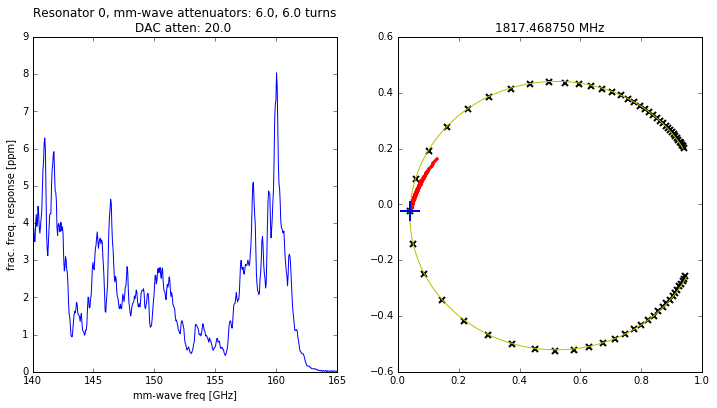

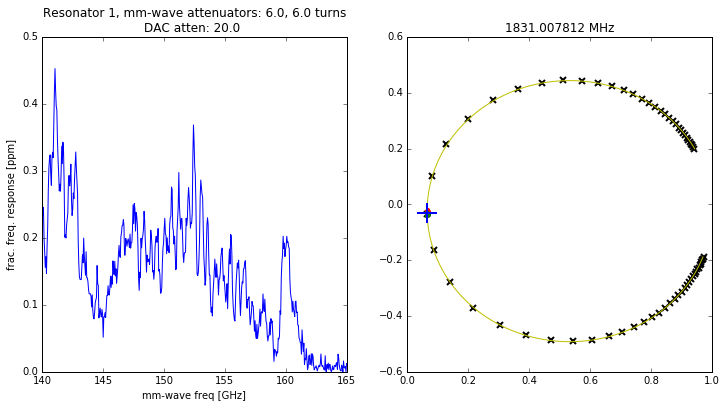

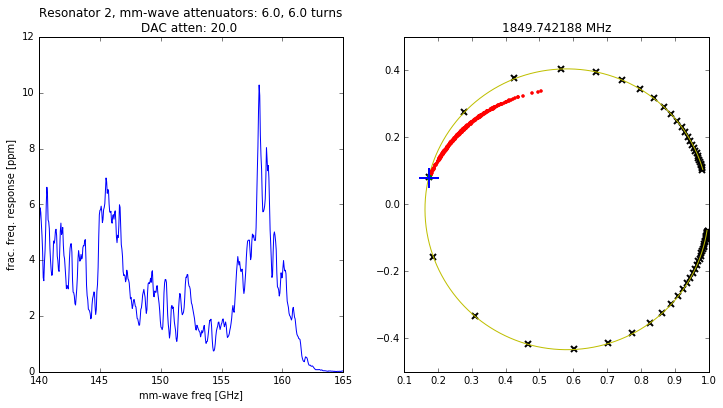

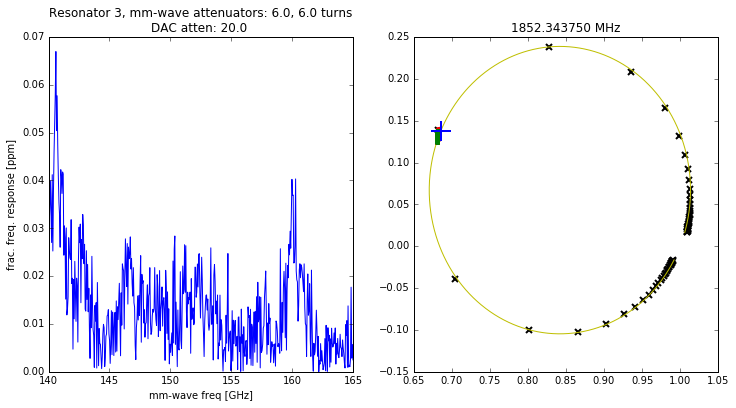

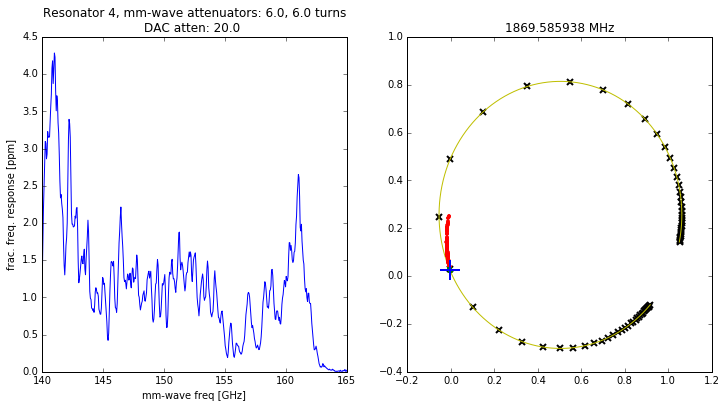

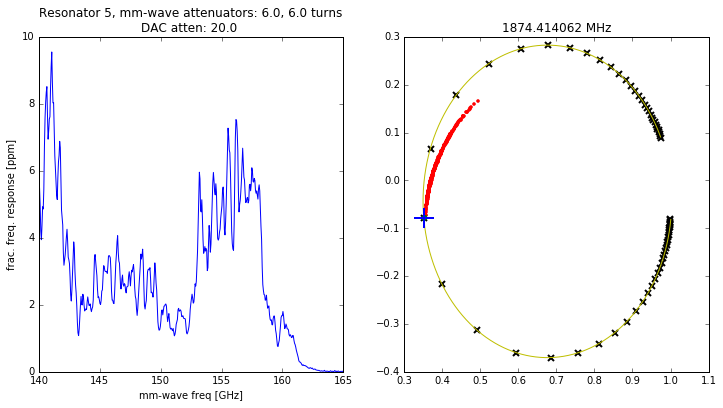

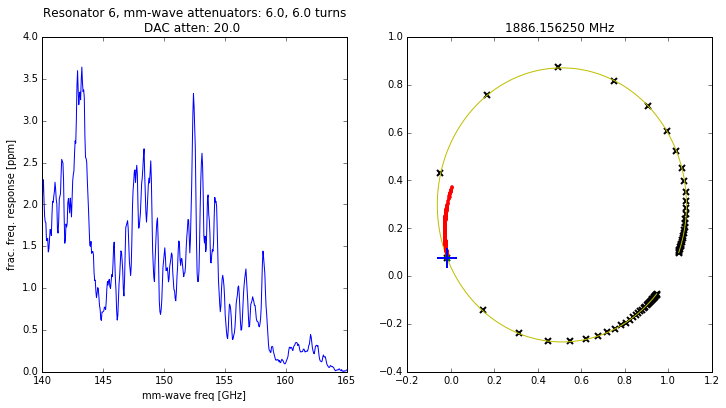

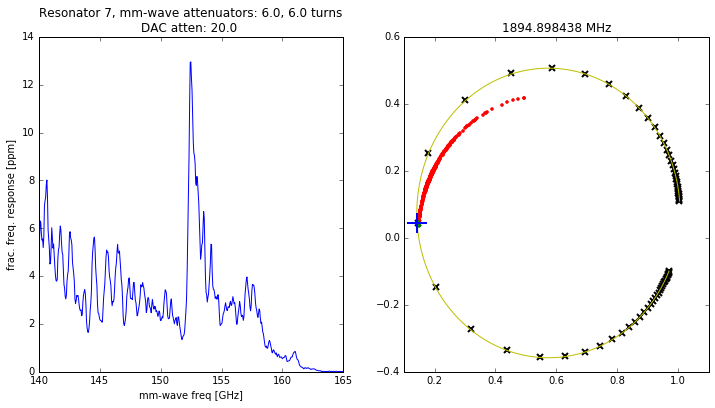

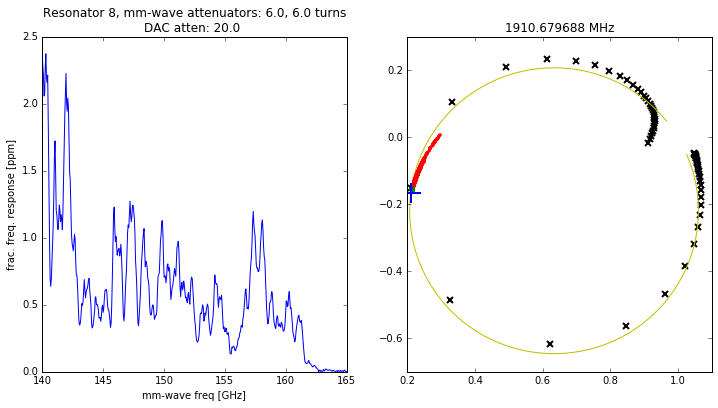

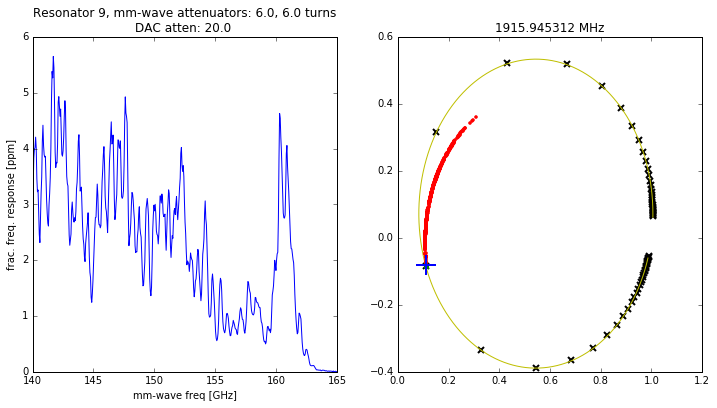

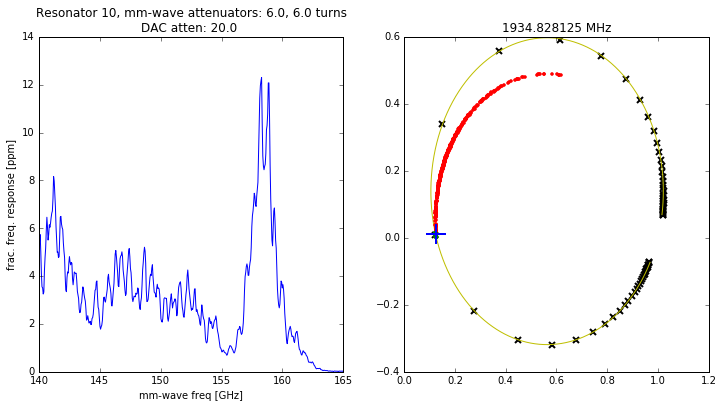

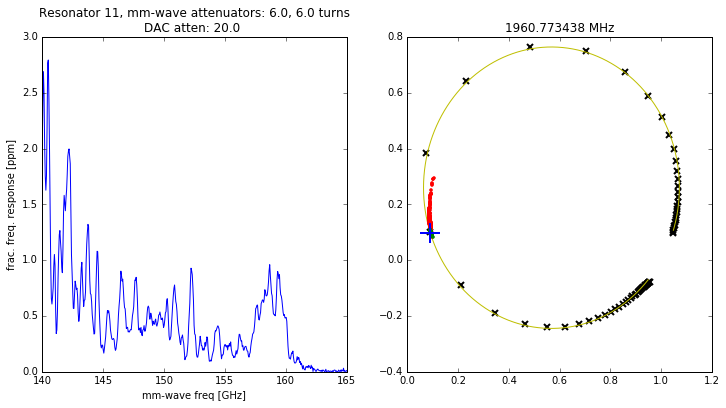

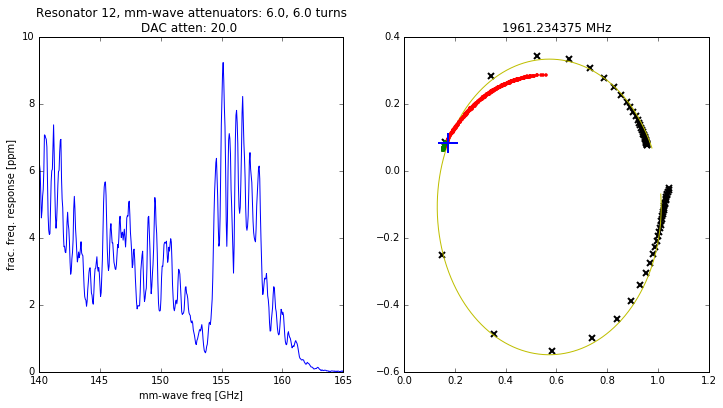

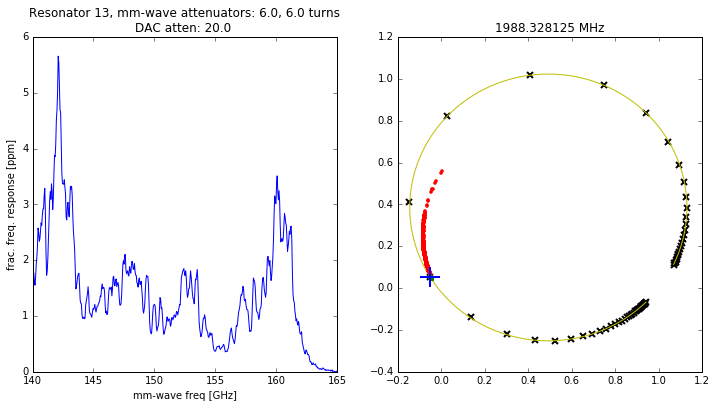

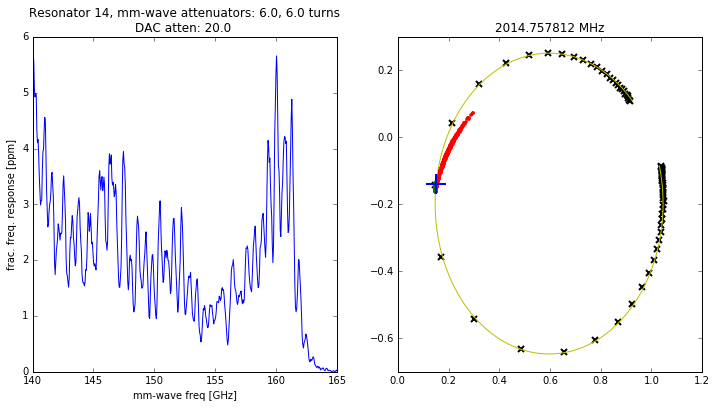

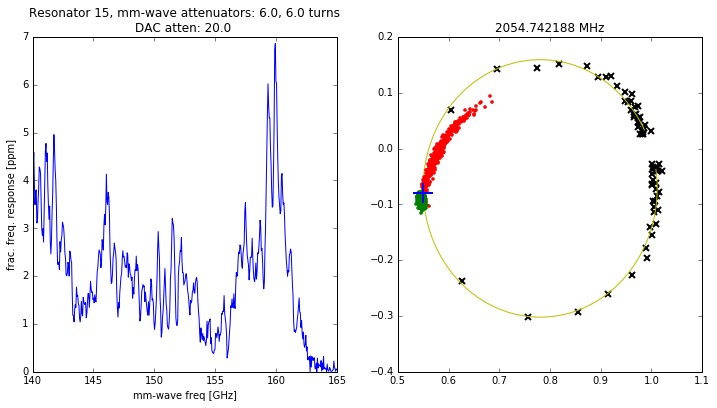

In [36]:
for mmw in mmws:
    blah= mmw.plot()

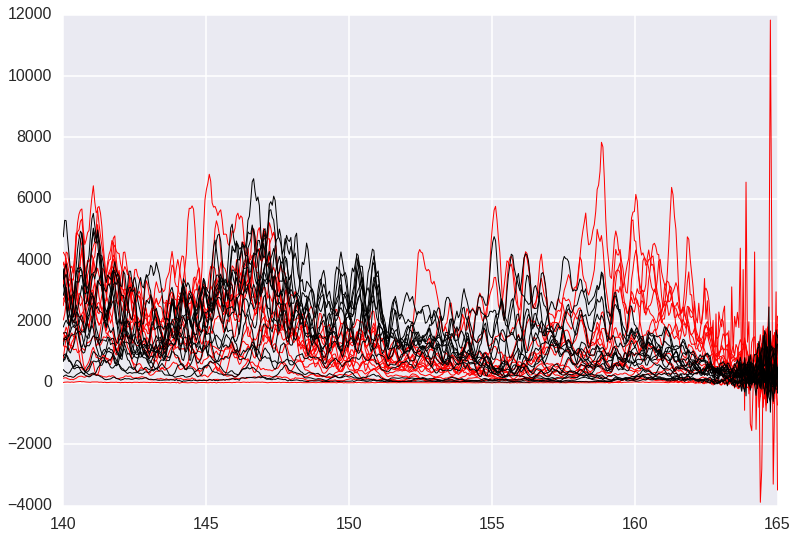

In [68]:
#figure(figsize=(18,6))
for k,mmw in enumerate(mmws):
    if k < 16:
        color = 'r'
    else:
        color = 'k'
    plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response/mmw.zbd_voltage,color=color)#/ mmw.zbd_voltage)
#ylim(.1,20)

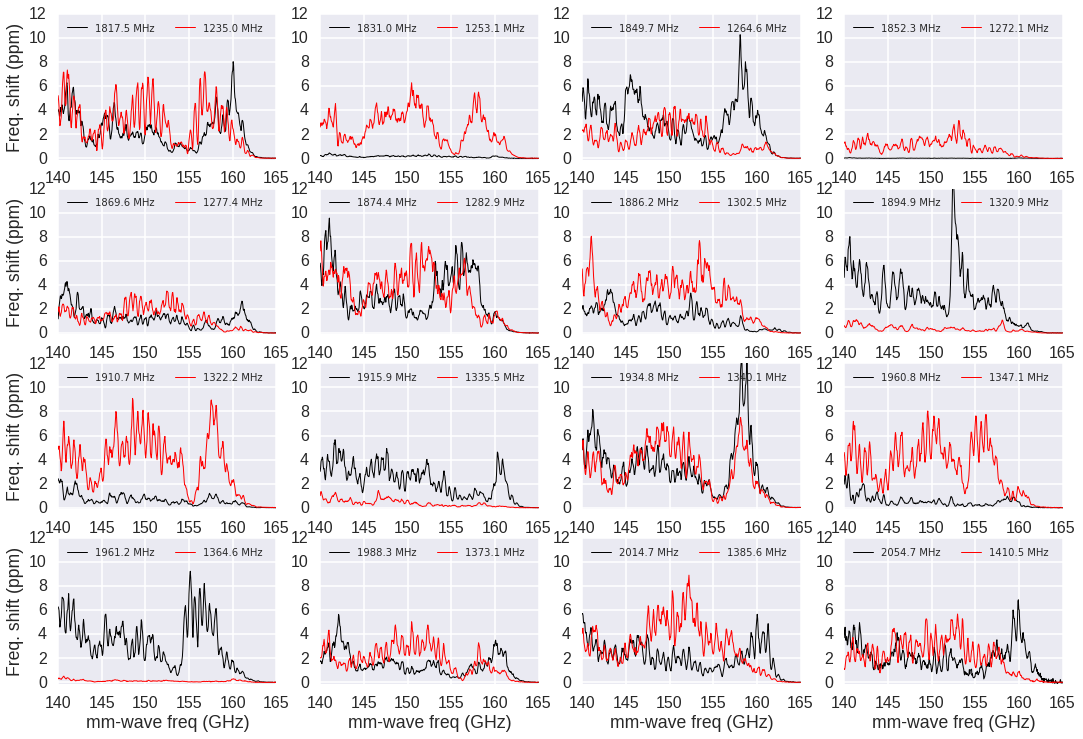

In [89]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k',label = ("%.1f MHz" % mmw.resonator.f_0))
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r',label = ("%.1f MHz" % mmw.resonator.f_0))
    ax.set_ylim(-.1,12)
    ax.legend(loc='upper left',ncol=2,prop=dict(size='medium'))
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')

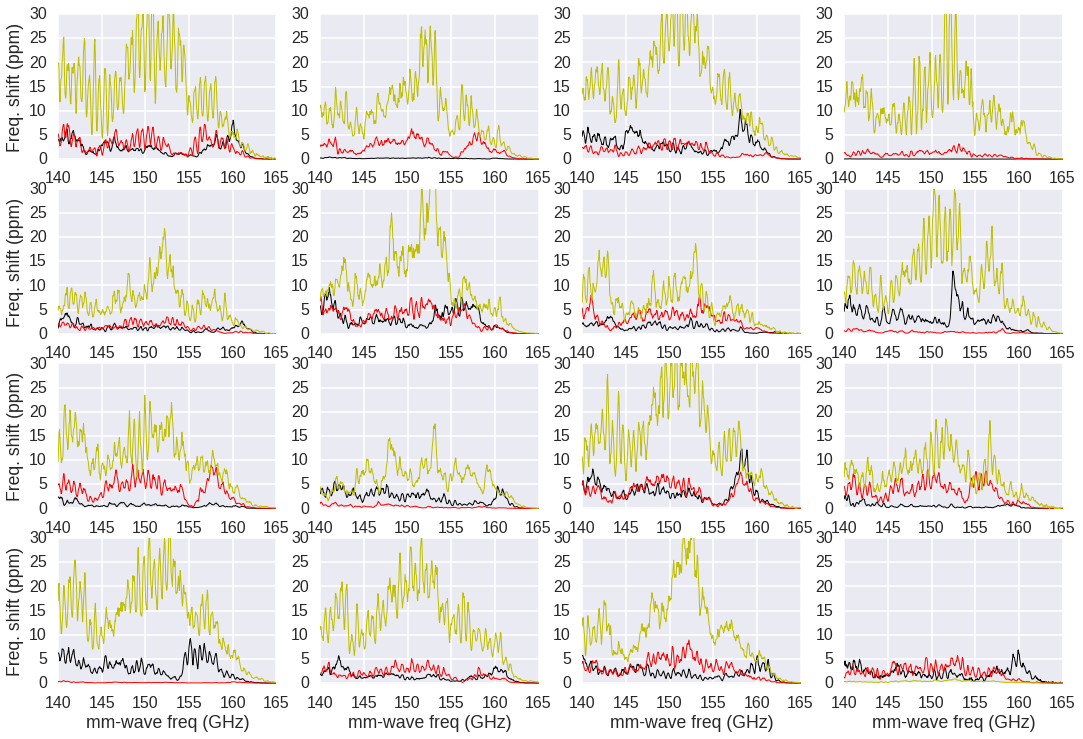

In [90]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    mmw = mmws[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'k')
    mmw = mmws[k+16]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'r')
    mmw = mmws_40nm[k]
    ax.plot(mmw.mmw_freq/1e9,1e6*mmw.mmw_frac_response,'y')
    ax.set_ylim(-.1,30)
for k in range(4):
    axs[-1,k].set_xlabel('mm-wave freq (GHz)')
    axs[k,0].set_ylabel('Freq. shift (ppm)')

In [87]:
[mmw.resonator.Q for mmw in mmws_40nm]

[3519.7746006694601,
 6108.9571192023523,
 8983.8165194406138,
 9226.8014567312803,
 9014.6737339707724,
 10555.492188428114,
 4968.5745769934083,
 9561.9142540455086,
 10838.903867452067,
 12066.054885739548,
 5157.5096481732453,
 3948.0536976445137,
 7377.260927086596,
 9068.3309630468902,
 9567.663719398779,
 1717.1703021522599]

In [85]:
len(mmws_40nm)

16

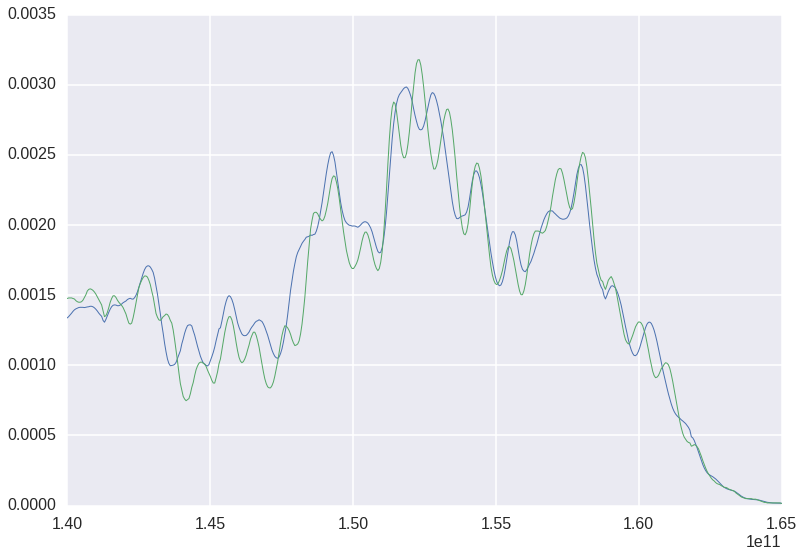

In [84]:
m40 = mmws_40nm[0]
m100 = mmws[0]
plot(m40.mmw_freq,m40.zbd_voltage)
plot(m100.mmw_freq,m100.zbd_voltage)

In [56]:
f0s = np.array([mmw.resonator.f_0 for mmw in mmws])
Qs = np.array([mmw.resonator.Q for mmw in mmws])
Qis = np.array([mmw.resonator.Q_i for mmw in mmws])
Qers = np.array([mmw.resonator.Q_e_real for mmw in mmws])

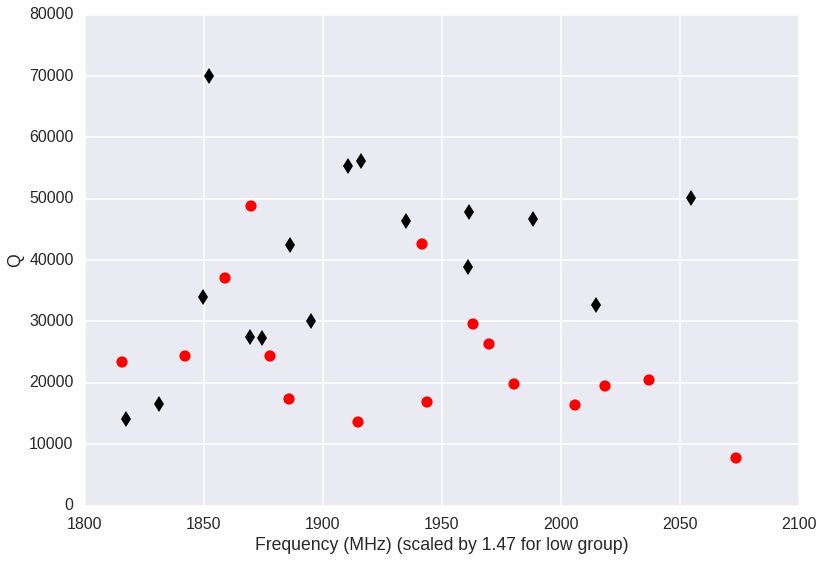

In [92]:
plot(f0s[:16],Qs[:16],'kd')
plot(f0s[16:]*1.47,Qs[16:],'ro')
xlabel('Frequency (MHz) (scaled by 1.47 for low group)')
ylabel('Q')

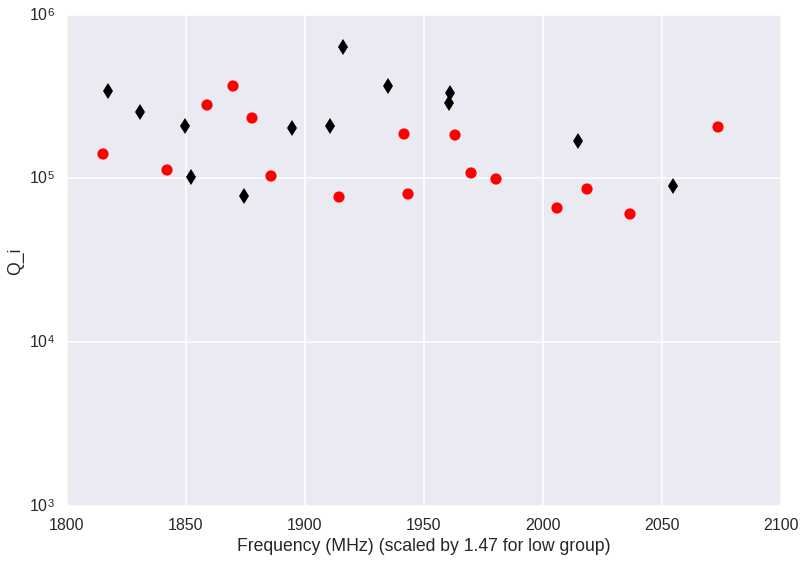

In [93]:
plot(f0s[:16],Qis[:16],'kd')
plot(f0s[16:]*1.47,Qis[16:],'ro')
ylim(1000,1e6)
yscale('log')
xlabel('Frequency (MHz) (scaled by 1.47 for low group)')
ylabel('Q_i')

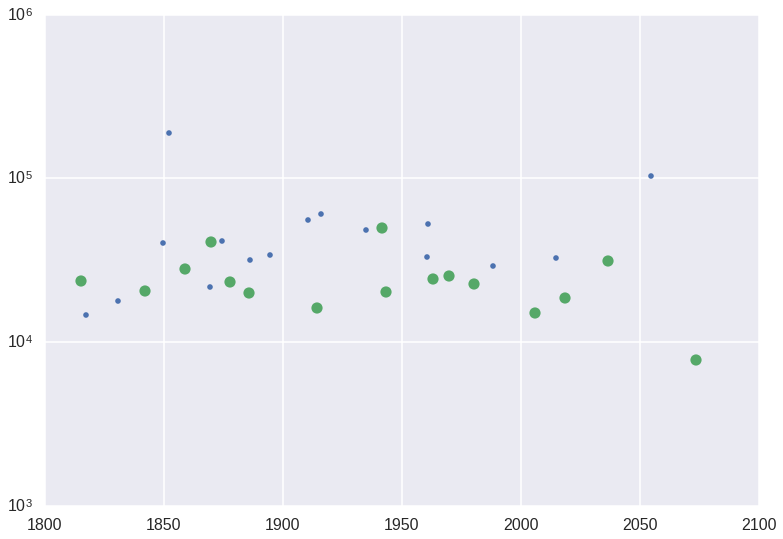

In [74]:
plot(f0s[:16],Qers[:16],'.')
plot(f0s[16:]*1.47,Qers[16:],'o')
ylim(1000,1e6)
yscale('log')

In [22]:
mmw.normalized_high.shape

(500,)

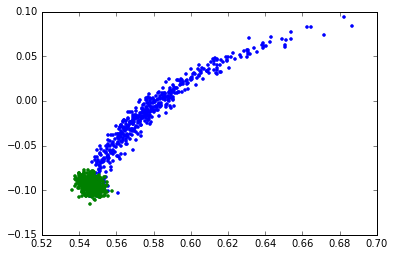

In [26]:
plot(mmw.normalized_high.real,mmw.normalized_high.imag,'.')
plot(mmw.normalized_low.real,mmw.normalized_low.imag,'.')

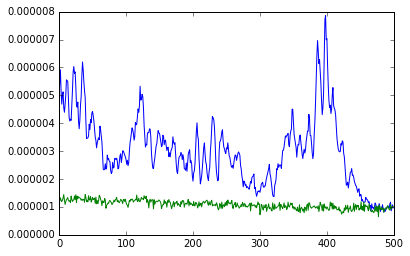

In [29]:
plot(mmw.mmw_on_frac_freq)
plot(mmw.mmw_off_frac_freq)
